In [1]:
from sentiment.models import *
from embedding import Embedding
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from konlpy.tag import Kkma
from konlpy.utils import pprint
from IPython.display import clear_output

from sentiment.utils import DataLoader2

In [2]:
EPOCHS = 10
BATCH_SIZE = 128
ETA = 1e-3
# torch.autograd.set_detect_anomaly(True)

In [3]:
# dloader = DataLoader(10)
train_loader = DataLoader2(BATCH_SIZE, mode="train")
valid_loader = DataLoader2(BATCH_SIZE, mode="valid")
test_loader = DataLoader2(BATCH_SIZE, mode="test")

In [4]:
sentiment_clf = SentimentPredictorWithContents().cuda()

In [5]:
optimizer = optim.Adam(sentiment_clf.parameters(), lr=ETA)

In [6]:
bce_criterion = nn.BCELoss()

In [7]:
def compute_accuracy(preds, y):
    preds[preds >= 0.5] = 1
    preds[preds < 0.5] = 0
    
    return torch.mean((y == preds).type(torch.FloatTensor))

In [8]:
def train_step(x, y):
    N = len(x)
    preds = []
    
    for doc in x:
        embeddeds = []
        for sen in doc:
            try:
                embedded = Embedding.get_sentiment_vector(sen).cuda().detach()
                embeddeds.append(embedded)
            except:
                continue
            
        embeddeds = torch.stack(embeddeds, dim=0)
        embeddeds = embeddeds.view(1, *embeddeds.size())

        pred = sentiment_clf(embeddeds)
        preds.append(pred)
        
    preds = torch.stack(preds, dim=0).view(-1)
            
    loss = bce_criterion(preds, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc = compute_accuracy(preds, y)
    
    return loss.item(), acc

In [9]:
def test_step(x, y):
    N = len(x)
    preds = []
    
    for doc in x:
        embeddeds = []
        for sen in doc:
            try:
                embedded = Embedding.get_sentiment_vector(sen).cuda().detach()
                embeddeds.append(embedded)
            except:
                continue
            
        embeddeds = torch.stack(embeddeds, dim=0)
        embeddeds = embeddeds.view(1, *embeddeds.size())

        pred = sentiment_clf(embeddeds)
        preds.append(pred)
        
    preds = torch.stack(preds, dim=0).view(-1)
            
    loss = bce_criterion(preds, y)
            
    loss = bce_criterion(preds, y)
    acc = compute_accuracy(preds, y)
    
    return loss.item(), acc

In [10]:
def train_mode():
    #sentence_enc.train()
    #context_enc.train()
    #mine_est.train()
    sentiment_clf.train()

def eval_mode():
    #sentence_enc.eval()
    #context_enc.eval()
    #mine_est.eval()
    sentiment_clf.eval()

In [11]:
def train():
    
    train_losses = []
    train_accs = []
    valid_accs = []
    
    for e in range(EPOCHS):
        
        train_loss = 0.0
        train_acc = 0.0
        valid_loss = 0.0
        valid_acc = 0.0
        
        train_mode()
        
        for x, y in train_loader.next_batch():
            y = torch.FloatTensor(y).cuda()
            loss, acc = train_step(x, y)
            train_loss += loss
            train_acc += acc
        
#             clear_output(wait=True)
#             print(f"train loss: {loss:.6f}, train acc: {acc:.4f}")
            
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        
        train_losses.append(train_loss)
        train_accs.append(train_acc)
            
        eval_mode()
        
        with torch.no_grad():
            for x, y in valid_loader.next_batch():
                y = torch.FloatTensor(y).cuda()
                loss, acc = test_step(x, y)
                valid_loss += loss
                valid_acc += acc
        
#                 clear_output(wait=True)
#                 print(f"valid loss: {loss:.6f}, valid acc: {acc:.4f}")
                
        valid_loss /= len(valid_loader)
        valid_acc /= len(valid_loader)
        
        valid_accs.append(valid_acc)
        
        torch.save(sentiment_clf, "sentiment/ckpts/sentiment_clf-with-contents.pt")
        
        clear_output(wait=True)

        print(f"Epochs {e+1}/{EPOCHS}")
        print(f"Train loss: {train_loss:.6f}, train acc: {train_acc:.4f}, valid acc: {valid_acc:.4f}")
        
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        
        axes[0].plot(train_losses)
        axes[0].set_title("train loss")
        axes[0].set_xlabel("epochs")
        axes[0].set_ylabel("loss")
        
        axes[1].plot(train_accs)
        axes[1].set_title("train acc")
        axes[1].set_xlabel("epochs")
        axes[1].set_ylabel("acc")
        
        axes[2].plot(valid_accs)
        axes[2].set_title("valid acc")
        axes[2].set_xlabel("epochs")
        axes[2].set_ylabel("acc")
        
        plt.tight_layout()
        plt.show()

Epochs 6/10
Train loss: 0.431243, train acc: 0.8133, valid acc: 0.7849


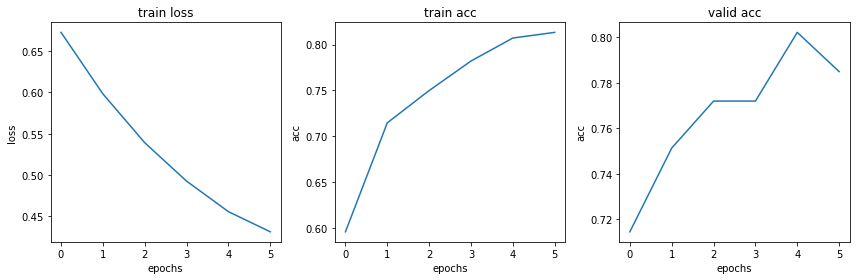

using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached model
using cached

In [ ]:
train()